In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

os.chdir('/tf-acno-projects/image-classification/test')

In [70]:
img_path = "happy_hako2.jpg"
class_mapping = {
    0: 'angry',
    1: 'disgusted',
    2: 'happy',
    3: 'sad',
    4: 'shocked'
}
# Create a dummy label for evaluation (assuming a multi-class classification, replace with actual if available)
dummy_label = np.array(
    [[0,
      0,
      1,
      0,
      0]
     ])# Adjust based on your class mapping


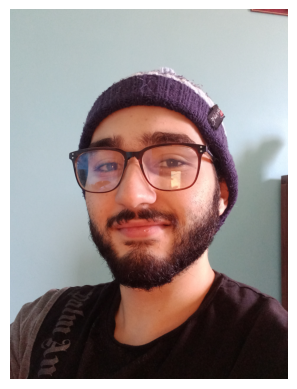

In [71]:
read_img = cv2.imread(img_path)
if read_img is None:
    raise ValueError("Image not found or unable to read.")

read_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
plt.imshow(read_img)
plt.axis('off')
plt.show()

# Convert the image to a TensorFlow tensor and resize it
resize = tf.image.resize(tf.convert_to_tensor(read_img, dtype=tf.float32), (128, 128))

resize = resize.numpy() / 255.0

In [72]:
re_trained_loaded_model = tf.keras.models.load_model("../models/re_trained_0.912.keras")
first_trained_loaded_model = tf.keras.models.load_model("../models/1_2024_12_5_0.912.keras")


In [73]:
#expand the dim of the image for the batch (256.256.3) to (1.256.256.3) , axis = 0 means it will be at the start
processed_image = np.expand_dims(resize, axis=0)

yhat_first_trained = first_trained_loaded_model.predict(processed_image)
yhat_re_trained = re_trained_loaded_model.predict(processed_image)

predicted_class = np.argmax(yhat_first_trained)
print(f'First Trained Model :')
print(f'Image: {img_path} , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")}, Probabilities: {yhat_first_trained} , argmax is : {predicted_class}')

predicted_class = np.argmax(yhat_re_trained)
print(f'Re Trained Model :')
print(f'Image: {img_path} , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")}, Probabilities: {yhat_re_trained} , argmax is : {predicted_class}')


1/1 [==============================] - 0s 61ms/step
First Trained Model :
Image: happy_hako2.jpg , Prediction: shocked, Probabilities: [[5.555e-05 0.000e+00 2.240e-01 0.000e+00 7.759e-01]] , argmax is : 4
Re Trained Model :
Image: happy_hako2.jpg , Prediction: shocked, Probabilities: [[4.47e-06 1.24e-05 5.96e-07 1.49e-06 1.00e+00]] , argmax is : 4


In [74]:
# Evaluate the model
loss, accuracy = first_trained_loaded_model.evaluate(processed_image, dummy_label, verbose=1)

1/1 [==============================] - 0s 209ms/step - loss: 1.5758 - accuracy: 0.0000e+00


In [75]:
res = re_trained_loaded_model.evaluate(processed_image, dummy_label, verbose=1)

1/1 [==============================] - 0s 178ms/step - loss: 14.4316 - precision: 0.0000e+00 - recall: 0.0000e+00 - categorical_accuracy: 0.0000e+00
